In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Forecast
import Date

In [2]:
## date in    %month / %day / %year    ##

def getrawHEATdemand(datewanted):
    
    [T, UV] = Forecast.forecastF(datewanted)
    
    T = pd.DataFrame(T)
    
    T.columns = ['Temp (°C)']
    
    T.rename(index={0:'00:00',1:'01:00',2:'02:00',3:'03:00',4:'04:00',5:'05:00',6:'06:00',7:'07:00',8:'08:00',9:'09:00',10:'10:00',11:'11:00',12:'12:00',13:'13:00',14:'14:00',15:'15:00',16:'16:00',17:'17:00',18:'18:00',19:'19:00',20:'20:00',21:'21:00',22:'22:00',23:'23:00'}, inplace=True)
    
    T['const'] = [18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5,18.5]
    
    T['diff'] = T['const']-T['Temp (°C)']
    
    T['Degree Days'] = T['diff']*(1/24)
    
    T['Heating Demand (kWh)'] = T['Degree Days']*211.3
    
    ## trying to include internal heat generation ##
    
    T['Heating Demand (kWh)'] = T['Heating Demand (kWh)']-50
    
    ## trying to include internal heat generation ##
    
    T['Heating Demand (kWh)'] = T['Heating Demand (kWh)'].clip(lower=0)
    
    T = T.drop(['Temp (°C)','const','diff','Degree Days'], axis = 1);
    
    return T


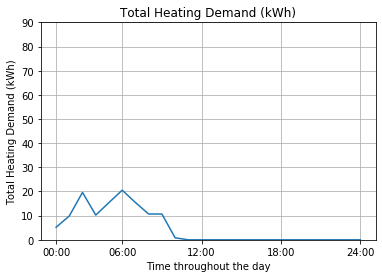

In [14]:
## date in    %month / %day / %year    ## 
daywanted = 160
datewanted = Date.getdatewanted(daywanted)
heatdemand = getHEATdemand(datewanted)
plt.plot(heatdemand)
plt.xlabel('Time throughout the day')
plt.ylabel('Total Heating Demand (kWh)')
plt.title('Total Heating Demand (kWh)')
plt.xticks((0,5,11,17,23),('00:00','06:00','12:00','18:00','24:00'))
plt.ylim(ymin=0, ymax=90)
plt.grid()
plt.show()

In [15]:
datewanted

'06/09/2018'

In [16]:
heatdemand.max()

Heating Demand (kWh)    20.540972
dtype: float64